---
title: "Visualise Matrix Transformation as Paper Folding"
format: 
    html:
        code-fold: true
        embed-resource: ture
---

In [571]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%config InlineBackend.figure_format='retina'
# to change default colormap
plt.rcParams["image.cmap"] = "Set3"
# to change default color cycle
myC= plt.cm.tab20b.colors
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=myC[:1]+myC[2:])
matplotlib.rcParams['figure.figsize'] = (20, 10)
plt.style.use('seaborn-v0_8-whitegrid')

m1 = np.array([[1,2],
            [3,4],
            [1,1],
            [5,4]])#two dimenstional tensor

weight = np.array([0.5,0.5])#what tensor will try to guess
np.dot(m1,weight)#if this were a scala problem this the value will be used for relu activation

array([1.5, 3.5, 1. , 4.5])

What maybe powerful is matrix will changes shapes. Would it matter what input shape I choose? 

In [572]:
print('weight2 is')
weight2 = np.array([[0.5,0.1,0.3],
                    [0.5,0.2,0.3]])#you can expand infinitly horisentally

print(weight2)
print('Using dot product we expand the width of the matrix to 3')
print(np.dot(m1,weight2))

print('Use another product to trave the dimension back ')
weight3 = np.array([[0.1,0.2],
                    [0.9,0.1],
                    [0.2,0.5]])
m3 = np.dot(np.dot(m1,weight2),weight3)
print(m3)
print("notice how the first matrix expand matrix dimention to 3 and the second to 2;")

weight2 is
[[0.5 0.1 0.3]
 [0.5 0.2 0.3]]
Using dot product we expand the width of the matrix to 3
[[1.5 0.5 0.9]
 [3.5 1.1 2.1]
 [1.  0.3 0.6]
 [4.5 1.3 2.7]]
Use another product to trave the dimension back 
[[0.78 0.8 ]
 [1.76 1.86]
 [0.49 0.53]
 [2.16 2.38]]
notice how the first matrix expand matrix dimention to 3 and the second to 2;


In [573]:
weight2 = np.array(
    [[0.5,0.5,0.5],
    [0.5,1,0.41]])
weight3 = np.array(
    [[1, 0.2],
    [0.9,0.1],
    [0.9,0.7]])
# notice how the th
weight = np.dot(weight2, weight3)
print(weight)

def my_transformation(m1, w):
    m3=m1.dot(w)
    return m3

def plot_transformation(m1, m3, ax=None):
    if ax is None:
        ax=plt.gca()
    for i in range(m1.shape[0]):
        x=[m1[i,0],m3[i,0]]
        y=[m1[i,1],m3[i,1]]
        ax.plot(x,y, 'k-',alpha=0.8,zorder=5)
    
    ax.scatter(m1[:,0],m1[:,1], zorder=6,alpha=1)
    ax.scatter(m3[:,0],m3[:,1],zorder=7, alpha=0.7)

[[1.4   0.5  ]
 [1.769 0.487]]


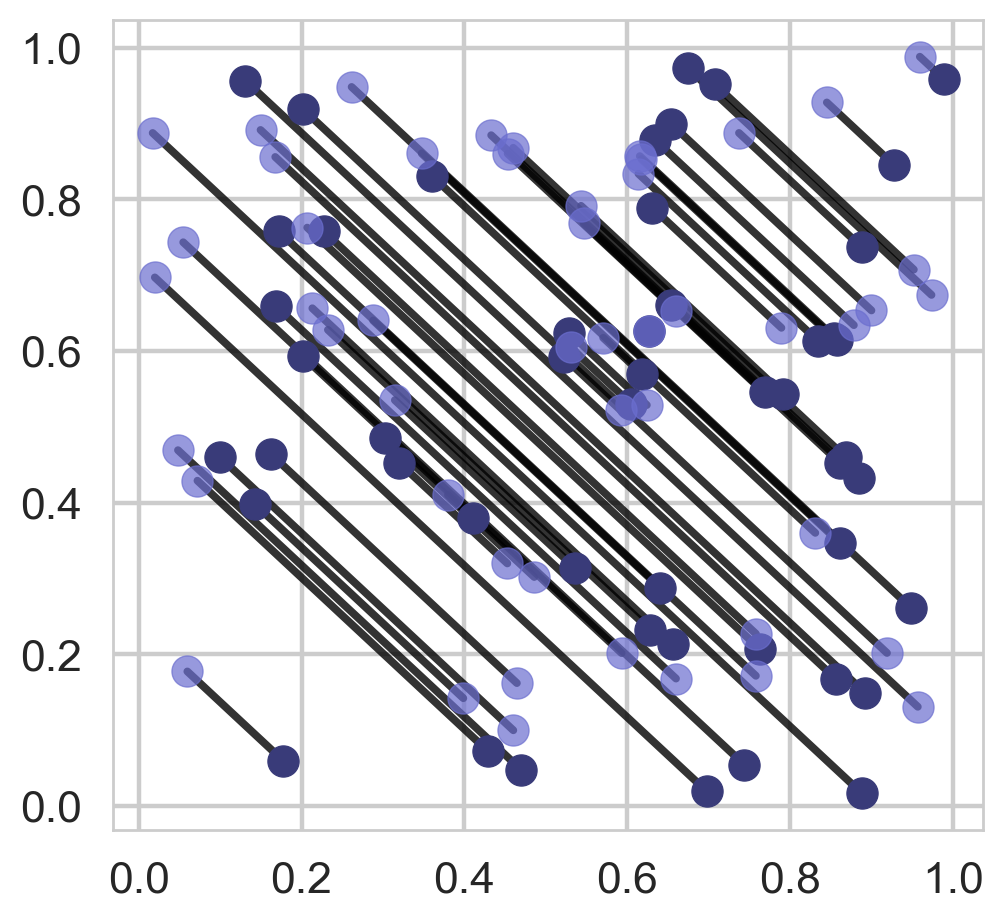

In [574]:
# This perhaps is really usefull to test to see what you neuro network is doing:
rotator = np.array([
    [0,1],
    [1,0]
])

figure,ax=plt.subplots(figsize=(5,5))

m1=np.random.random((50,2))
m2=my_transformation(m1, rotator)
plot_transformation(m1,m2,ax=ax)

### Explore Effect of Different Matrix on Univarity Sampled Matrix:

Text(0.5, 0.98, 'Explore Geometric Property of Weight Matrix..')

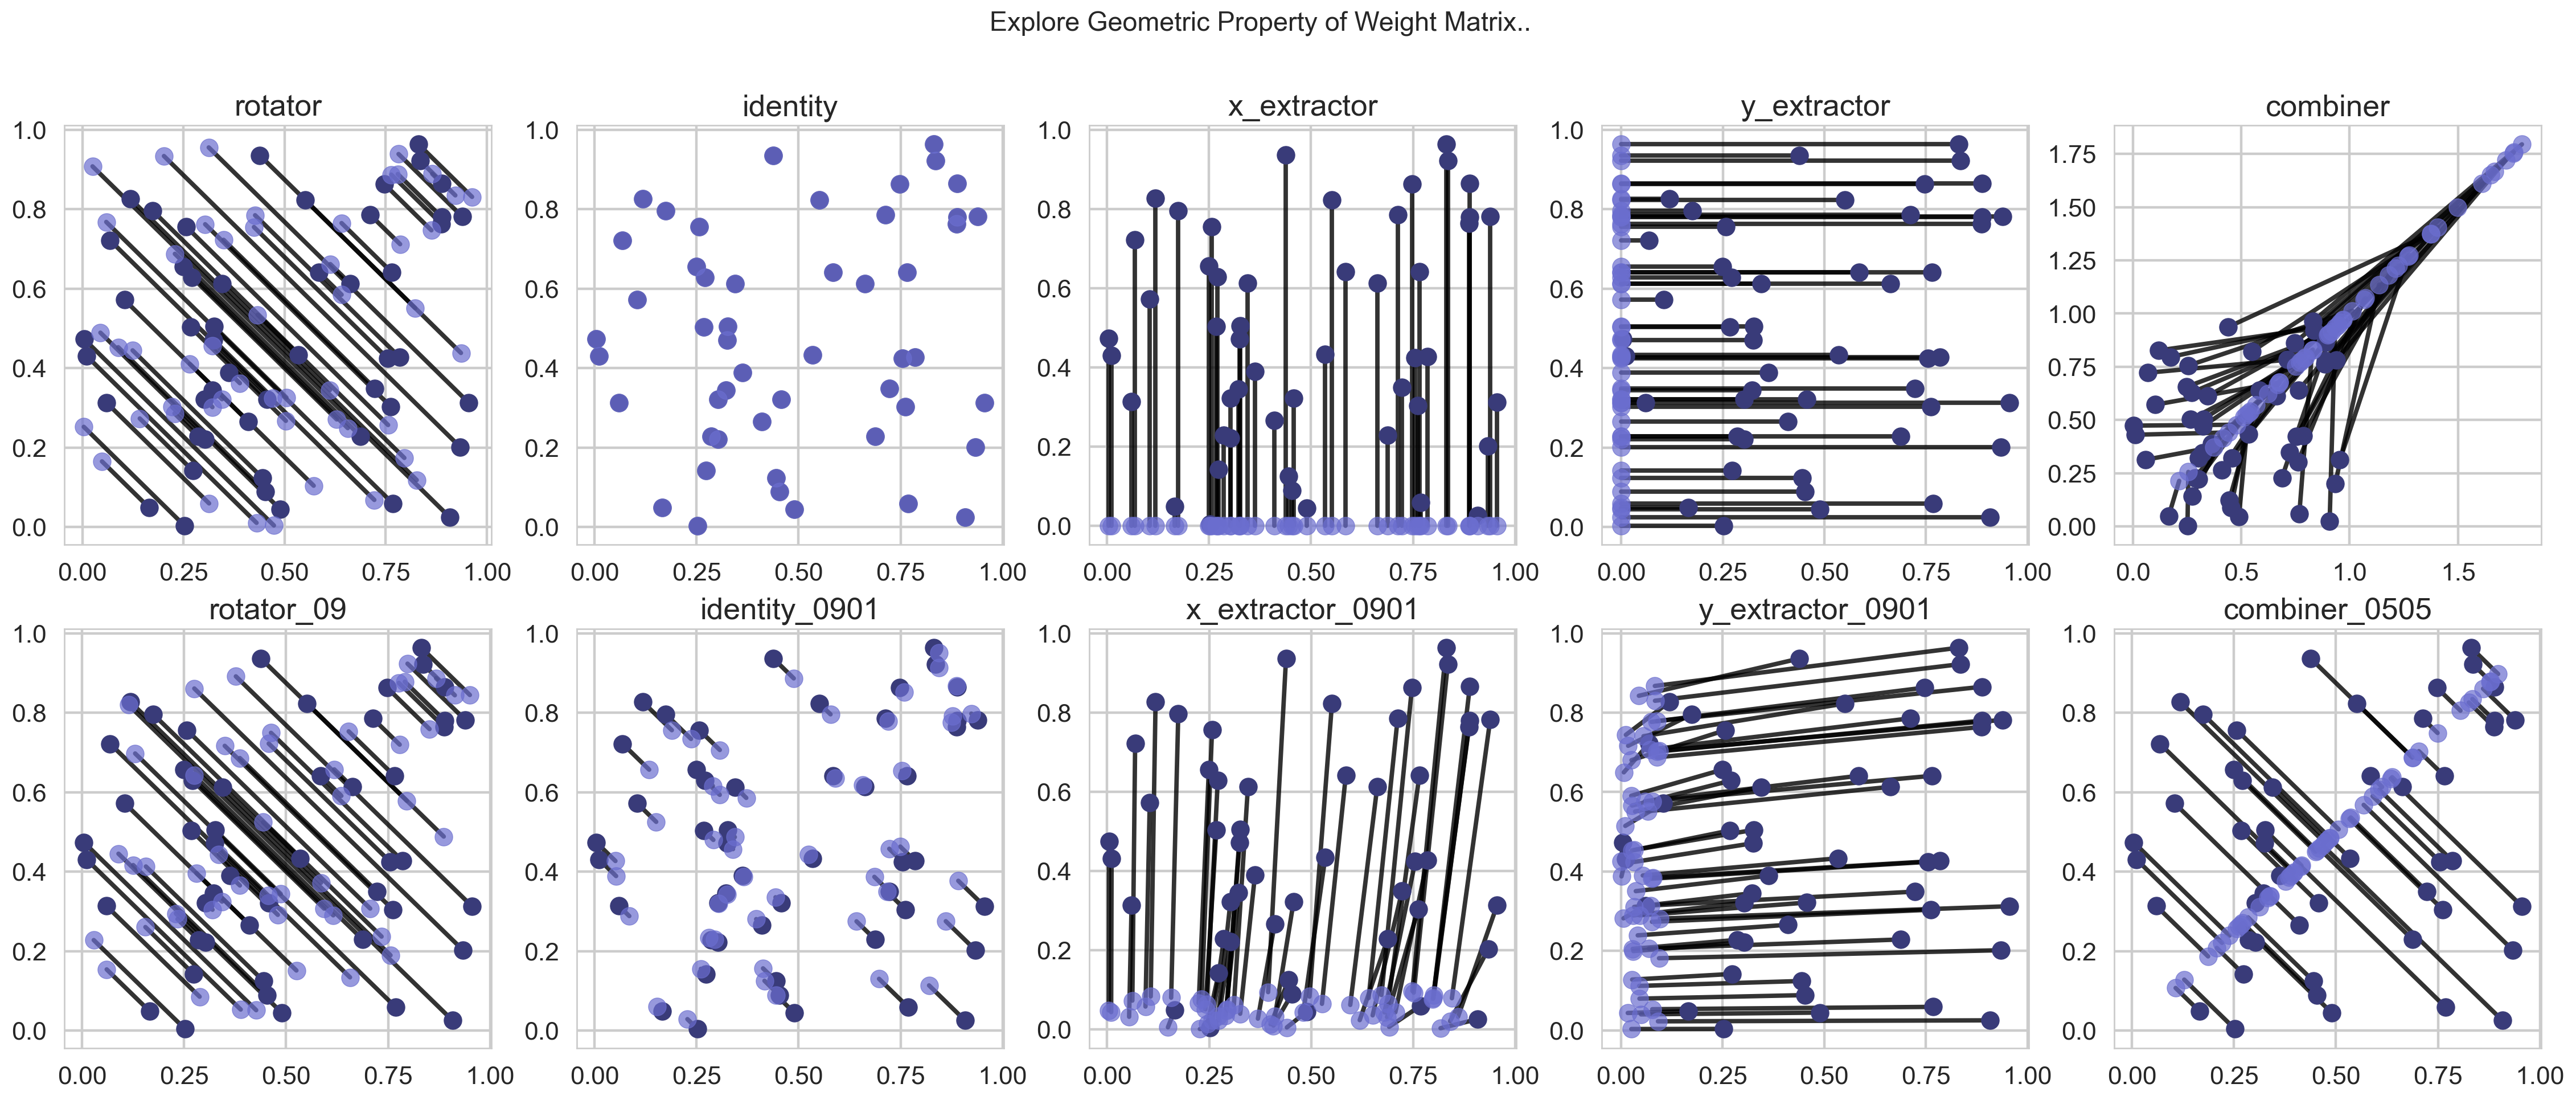

In [575]:

mator = dict(
    rotator = np.array(
        [[0,1],
         [1,0]]),
    identity = np.array(
        [[1,0],
         [0,1]]),
    x_extractor = np.array(
        [[1,0],
         [0,0]]),
    y_extractor = np.array(
        [[0,0],
         [0,1]]),
    combiner=np.array(
        [[1,1],
         [1,1]]
    ),
    rotator_09 = np.array(
        [[0.1,0.9],
         [0.9,0.1]]),
    identity_0901 = np.array(
        [[0.9,0.1],
         [0.1,0.9]]),
    x_extractor_0901 = np.array(
        [[0.9,0.0],
         [0.0,0.1]]),
    y_extractor_0901 = np.array(
        [[0.1,0.0],
         [0.0,0.9]]),
    combiner_0505=np.array(
        [[0.5,0.5],
         [0.5,0.5]]
    )
)

figure, axs = plt.subplots(2, int(len(mator)/2), figsize=(25,10))
m1=np.random.random((50,2))

for i, (name, mtx) in enumerate(mator.items()):
    ncol=len(mator)/2
    ax=axs[int(i//ncol), int(i%ncol)]
    m2=my_transformation(m1, mtx)
    plot_transformation(m1,m2, ax=ax)
    ax.set_title(name)
figure.suptitle('Explore Geometric Property of Weight Matrix..')

This time adjust the higher number down and the low number up:

Text(0.5, 0.98, 'More Weight Matrixs..')

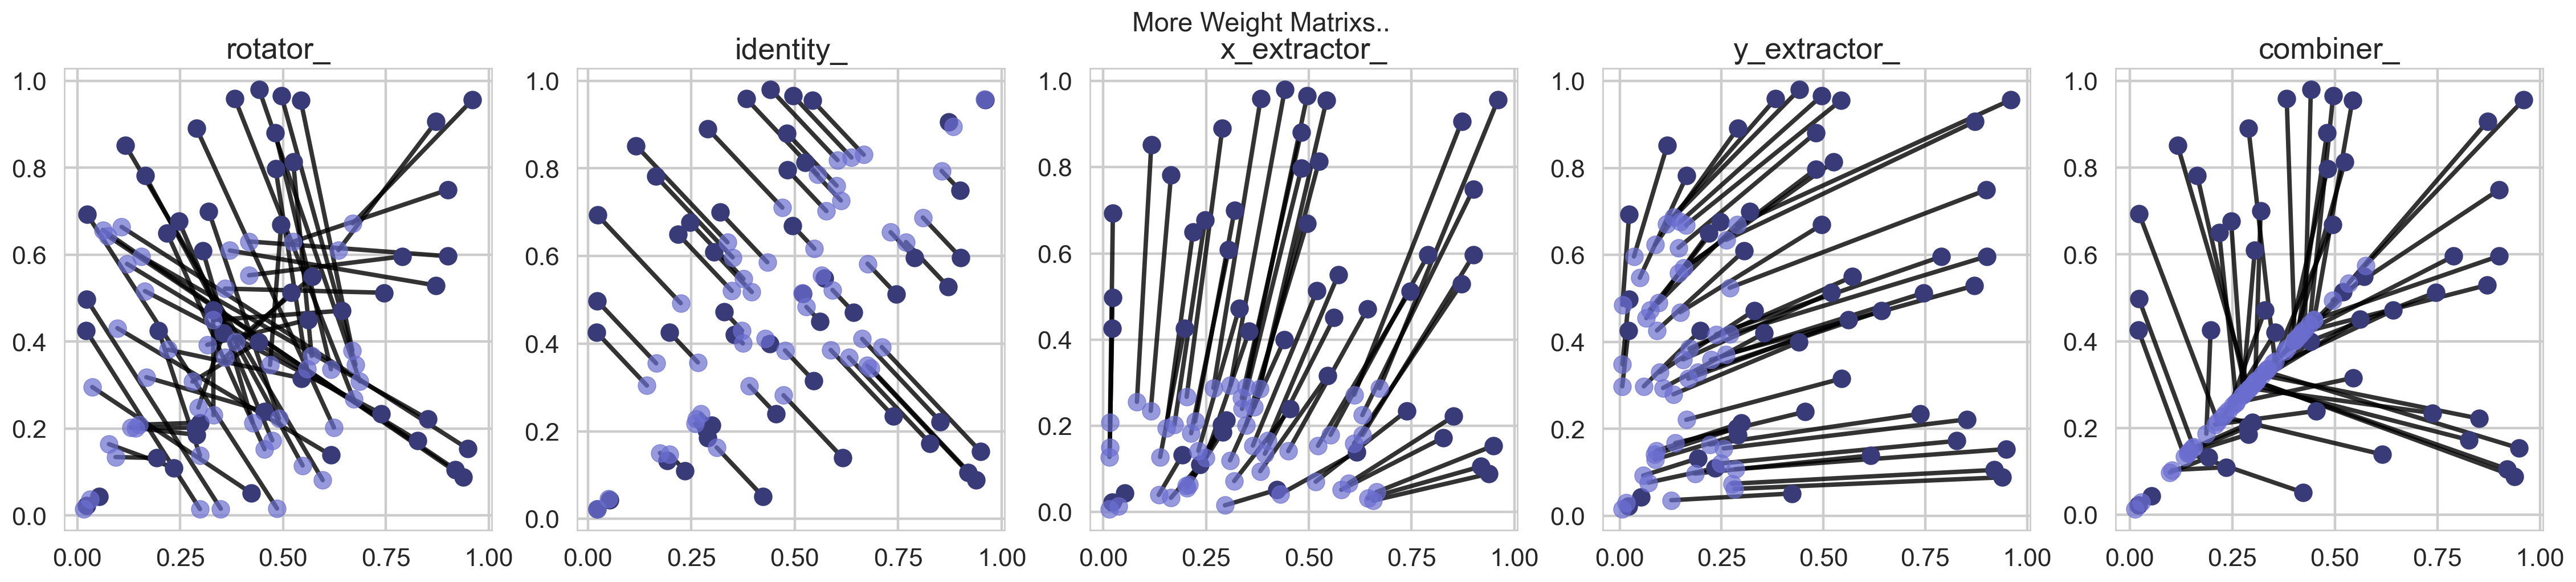

In [514]:

mator_2=dict(
    rotator_ = np.array(
        [[0.0,0.7],
         [0.7,0.0]]),
    identity_ = np.array(
        [[0.7,0.3],
         [0.3,0.7]]),
    x_extractor_ = np.array(
        [[0.7,0.0],
         [0.0,0.3]]),
    y_extractor_ = np.array(
        [[0.3,0.0],
         [0.0,0.7]]),
    combiner_=np.array(
        [[0.3,0.3],
         [0.3,0.3]]
    ),
)

figure, axs = plt.subplots(1, int(len(mator_2)), figsize=(25,5))
m1=np.random.random((50,2))

for i, (name, mtx) in enumerate(mator_2.items()):
    ncol=len(mator)/1
    ax=axs[i]
    m2=my_transformation(m1, mtx)
    plot_transformation(m1,m2, ax=ax)
    ax.set_title(name)
figure.suptitle('More Weight Matrixs..')

## Create a Contour visualiualisation of tendency

Next I want to visualise the tendency the matrix do for sampled at each points...
I found two visual idiom: `meshgird` and `quiver`.

(-2.0, 1.5, -2.0, 1.5)

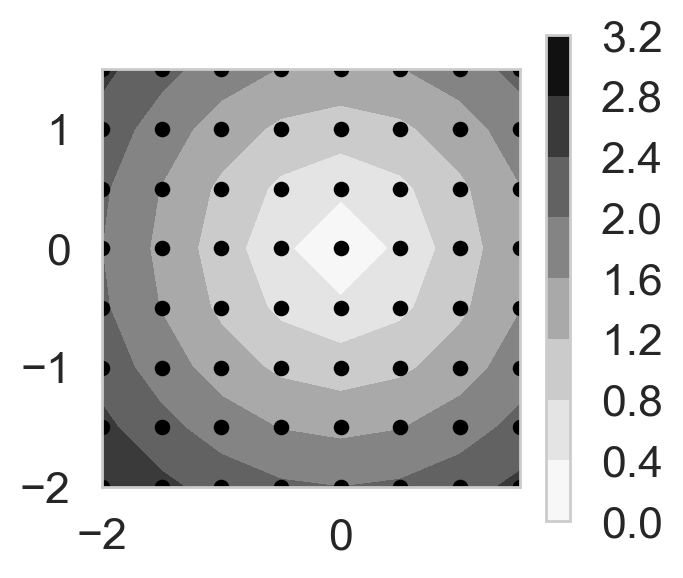

In [631]:

v1=np.arange(-2, 2, .5)
v2=np.arange(-2, 2, .5)
x,y = np.meshgrid(v1, v2)

# to help understand what np.meshgird does. 
# It helps creates cross from two vector
assert x.shape==y.shape
assert len(v1)==x.shape[1]
assert x.size == len(v1) * len(v2)

plt.figure(figsize=(3,3))
plt.plot(x,y,marker='.',linestyle='none',color='k')

x,y = np.meshgrid(v1, v2)
z=np.sqrt(x**2 + y**2)
plt.contourf(x,y,z)
plt.colorbar()
plt.axis('scaled')

# z = x*np.exp(-x**2 - y**2)
# v, u = np.gradient(z, .2, .2)
# fig, ax = plt.subplots()
# q = ax.quiver(x,y,u,v)
# plt.show()

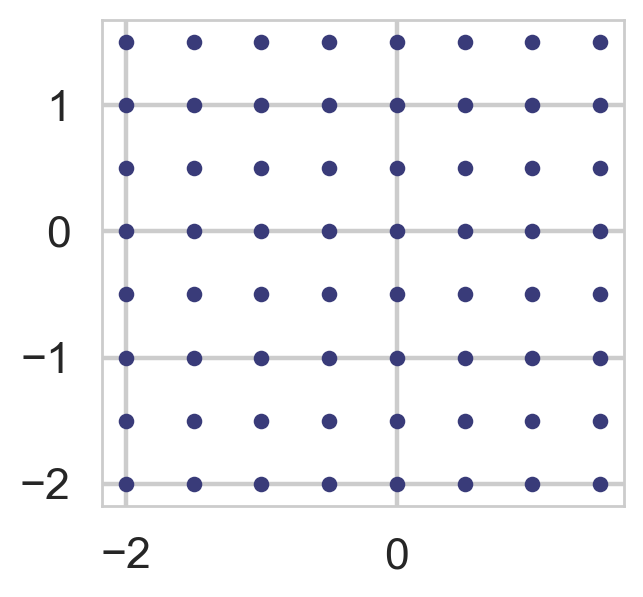

In [663]:
cord=np.vstack((x.reshape(1,x.size),y.reshape(1,y.size))).T
plt.figure(figsize=(3,3))
plt.plot(cord[:,0],cord[:,1],marker='.',linestyle="none")